In [2]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys

from ROOT import TFile, TTree
from array import array


def Landau(x,a, MP,xi):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    return  C1 * C3

def Landgauss(x,a, MP, xi, b,eps):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    C4 = C1 * C3
    C5 = b * np.exp(-x/eps)
    return  C4 + C5

In [3]:
## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [4]:
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_393_Sol_0.7_Elip_0.65_NSIGMAS_13_SIZE_250x539_KeV.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_Imgs_393_Sol_0.7_Elip_0.65_NSIGMAS_13_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_dEDL_0_SIZE_250x539_KeV_.pkl'


# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_0_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_100_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_200_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_500_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_600_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_800_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1000_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1100_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1200_SIZE_250x539_KeV_n.pkl'
 
path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1400_SIZE_250x539_KeV_n.pkl'

# path = './dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_16_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1400_SIZE_250x539_KeV_n.pkl'


### === Path de espectro de energía de todos los clusters === ###
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_to_4_Imgs_189_Sol_0.7_Elip_0.65_KeV.pkl'
# # path_antes = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_KeV.pkl'

path_all = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_250x529__NSIGMAS_5sci_KeV.pkl'
# # path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_400x700__NSIGMAS_5_KeV.pkl'
# path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_300x529__NSIGMAS_5_KeV.pkl'
# # path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_250x529__NSIGMAS_5_KeV.pkl'
# path_all = './dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_11_SIZE_250x529__NSIGMAS_5_KeV.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

histogram_all = open(path_all, 'rb')
data_histogram_all = pck.load(histogram_all)
histogram_all.close()

In [5]:
#### Visualizar las keys del diccionario ####
print('Las unidades de los datos están en: ', data_histogram['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secuandarias por extensión: ', data_histogram['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))


#### Visualizar las keys del diccionario ####
print('Las unidades de los datos están en: ', data_histogram_all['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram_all.keys())
print('Llaves secuandarias por extensión: ', data_histogram_all['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))

Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_Muons_Detected', 'Energy_Units', 'Elipticity', 'Solidity', 'Fit_errors', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'gain', 'elip', 'sol', 'all_events_elip', 'all_events_sol', 'datamasked', 'run'])
Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_clusters_detected', 'Energy_Units', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge'])


In [6]:
# print('Elipcidad por extensión: ', data_histogram['Elipticity'])
print('Solidity por exensión: ', data_histogram['Solidity'])

Solidity por exensión:  [0.65, 0.65, 0, 0.65]


In [7]:
data_muons_extension_1 = data_histogram['extension_1']
data_muons_extension_2 = data_histogram['extension_2']
data_muons_extension_4 = data_histogram['extension_4']

data_all_extension_1 = data_histogram_all['extension_1']
data_all_extension_2 = data_histogram_all['extension_2']
data_all_extension_4 = data_histogram_all['extension_4']

print(data_muons_extension_1.keys())
print(data_all_extension_1.keys())

dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'gain', 'elip', 'sol', 'all_events_elip', 'all_events_sol', 'datamasked', 'run'])
dict_keys(['charge'])


In [7]:
# data_muons_extension_1['run']

In [8]:
n_muons = data_histogram['All_Muons_Detected']
print('Se detectaron ', n_muons, ' muones (contando las 3 extensiones)')

Se detectaron  2833  muones (contando las 3 extensiones)


## Espectro de Energía

### Todos los clusters

/tmp/ipykernel_4184/242649556.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


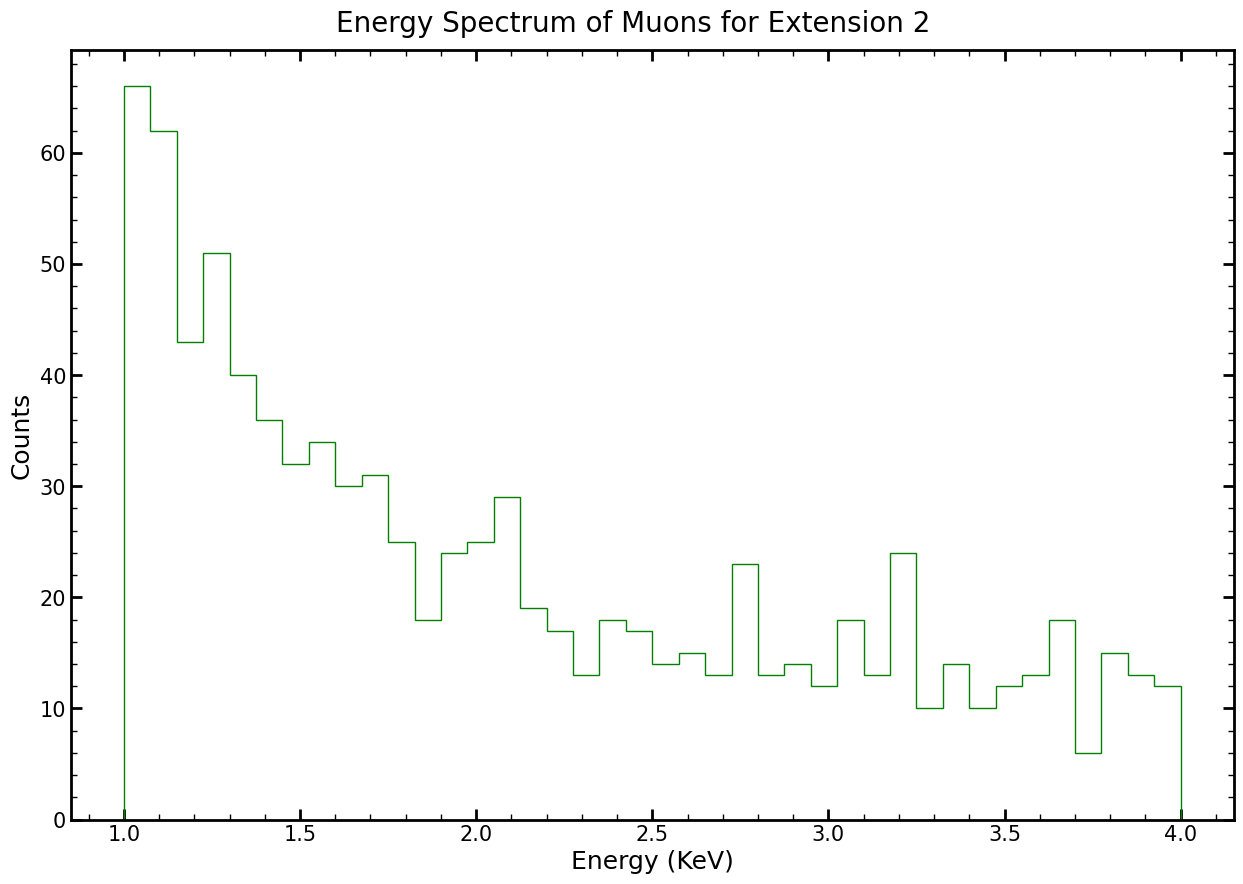

/tmp/ipykernel_4184/242649556.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


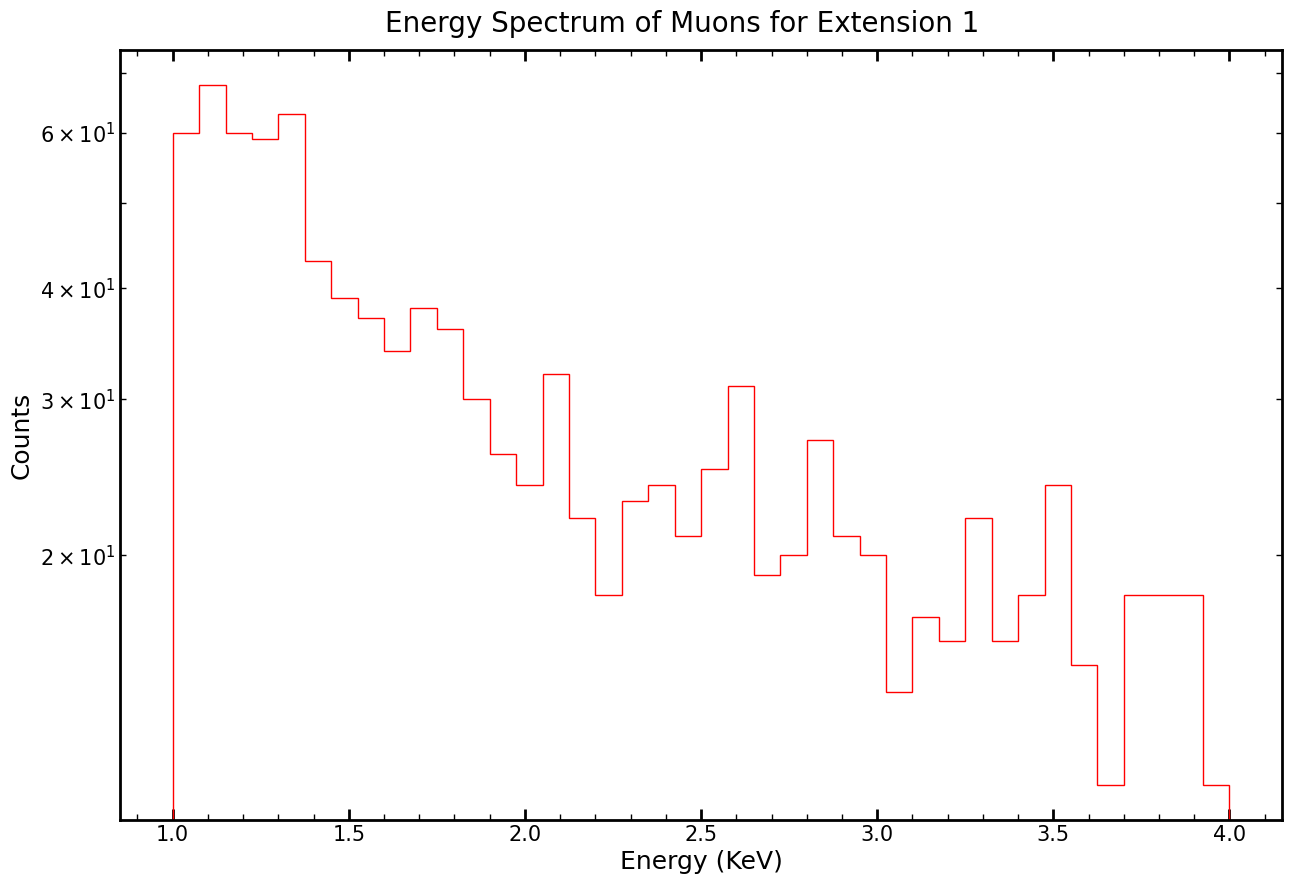

/tmp/ipykernel_4184/242649556.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


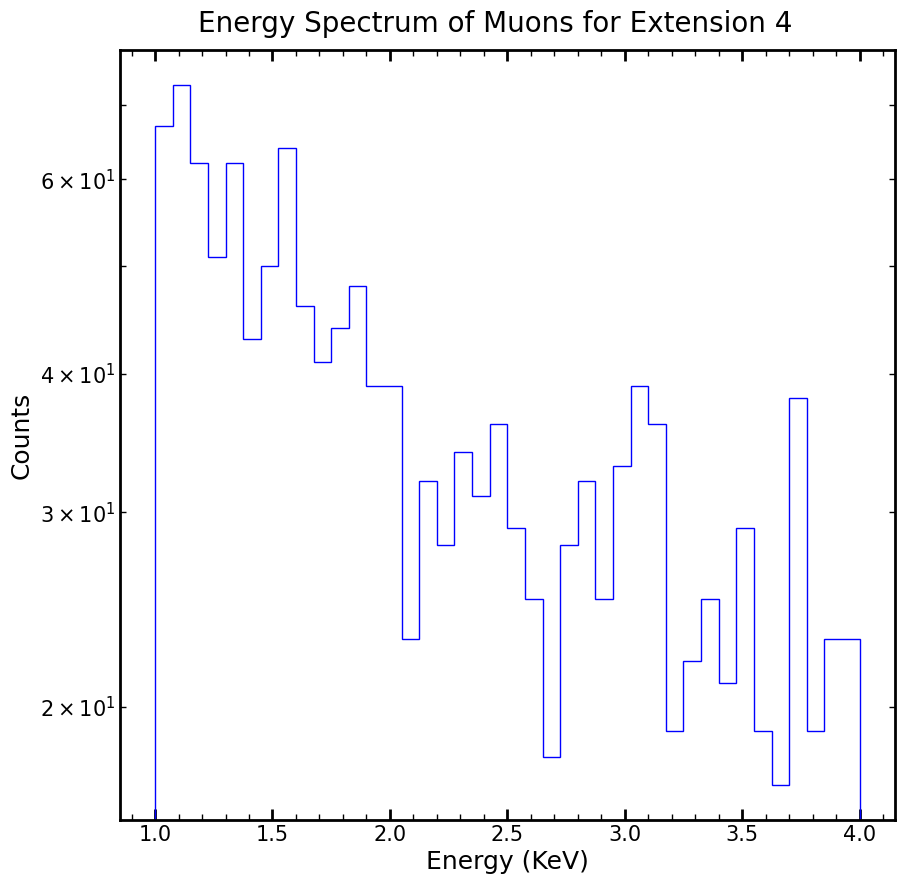

In [33]:
# print(np.max(data_muons_extension_4['charge']))
BINS = 40
plot_range = (1, 4)

############################################ ----- EXTENSION 2 ----- ###################################
fig, axs = plt.subplots(figsize = [15,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_all_extension_2['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [15,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(data_all_extension_1['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()


############################################ ----- EXTENSION 4 ----- ###################################
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_all_extension_4['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
# axs.set_ylim(0,1000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

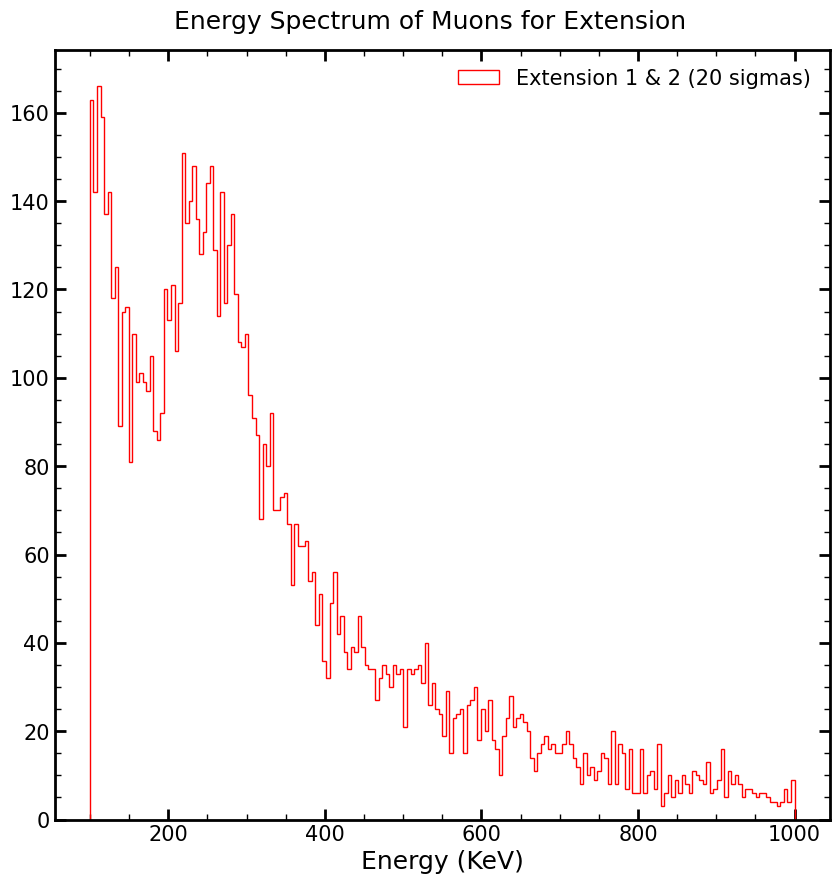

In [27]:
data_ext_1_2_all = data_all_extension_1['charge'] + data_all_extension_2['charge']

Bins = 200
max_energy = 1000
min_energy = 100
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy),
# 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.hist(data_ext_1_2_all, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.legend()
# axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [10]:
hist, bins_edges = np.histogram(data_ext_1_2_all, bins=150, range = (200, max_energy))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  216.0  KeV


In [ ]:
# N_Muons = array('f', [-9999])
# Thet_Rad = array('f', [-9999])
# Phi_Rad = array('f', [-9999])
# Energy_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])

location_file = '../Simulacion_ab_initio/'
file_root_name = 'Edep_NSAMP324_300x529_EXPOSURE_4504_MeV.root'
# file_root_name = 'Edep_NSAMP324_250x529_EXPOSURE_4504_MeV.root'
# file_root_name = 'Edep_NSAMP324_250x529_EXPOSURE_4504_MeV_0.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

# tree.Branch('nmuon',N_Muons, 'nmuon/F' )
# tree.Branch('thet', Thet_Rad, 'thet/F')
# tree.Branch('phi', Phi_Rad, 'phi/F')
# tree.Branch('epri', Energy_array, 'epri/F')

tree.Branch('l', DeltaL_array, 'l/F')
tree.Branch('edep', Energy_Landau_array, 'edep/F')

# for i in np.arange(0, len(data_muons_extension_2['charge'])):
#     # N_Muons[0] = list_nmuons[i]
#     # N_Muons[0] = dict_muons['NMuon'][i]
#     # Thet_Rad[0] = dict_muons['Theta(Rad)'][i]
#     # print(Thet_Deg[0])
#     #print(f'Ei={i} Energy_Landau={dict_muons_in_CCD}') 
#     # Phi_Rad[0] = dict_muons['Phi(Rad)'][i]
#     # Energy_array[0] =  dict_muons['Energy-SD(MeV)'][i] 
#     # DeltaL_array[0] = -1
#     Energy_Landau_array[0] = data_muons_extension_2['charge'][i] / 1000
#     # print(Energy_Landau_array[0])
#     # th_deg = dict_muons['Theta(Deg)'][0]
#     tree.Fill()

for i in np.arange(0, len(data_ext_1_2)):
    Energy_Landau_array[0] = data_ext_1_2[i] / 1000
    
    tree.Fill()

tree.Write()
file.Close()

### Variando Nsigmas

In [47]:
path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_20_KeV.pkl'
path_5sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_5_KeV.pkl'
path_10sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_10_KeV.pkl'
path_15sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_15_KeV.pkl'
path_20sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_20_KeV.pkl'



histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

histogram_5 = open(path_5sig, 'rb')
data_histogram_5= pck.load(histogram_5)
histogram_5.close()

histogram_10 = open(path_10sig, 'rb')
data_histogram_10= pck.load(histogram_10)
histogram_10.close()

histogram_15 = open(path_15sig, 'rb')
data_histogram_15= pck.load(histogram_15)
histogram_15.close()

histogram_20 = open(path_20sig, 'rb')
data_histogram_20= pck.load(histogram_20)
histogram_20.close()


Clusters detectados (5 sigmas):  3946662
Clusters detectados (10 sigmas):  2265944
Clusters detectados (15 sigmas):  1292852
Clusters detectados (20 sigmas):  685120


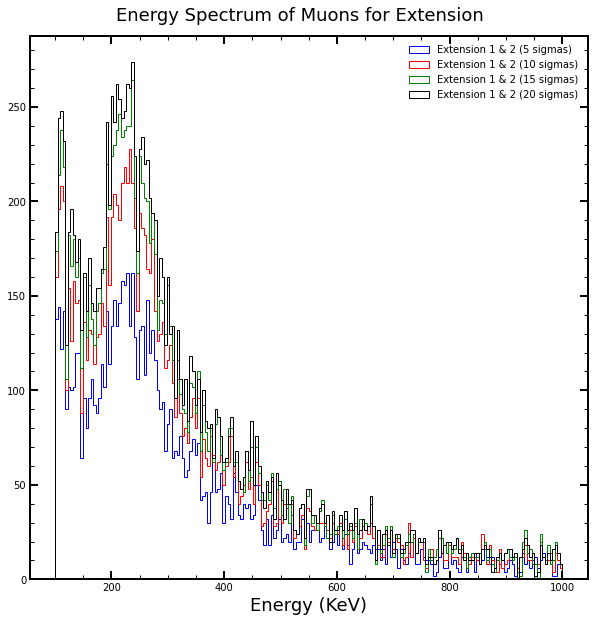

In [49]:
data_ext_1_2 = data_muons_extension_1['charge'] + data_muons_extension_2['charge']

data_all_extension_1_sig5 = data_histogram_5['extension_1']
data_all_extension_2_sig5 = data_histogram_5['extension_2']

data_all_extension_1_sig10 = data_histogram_10['extension_1']
data_all_extension_2_sig10 = data_histogram_10['extension_2']

data_all_extension_1_sig15 = data_histogram_15['extension_1']
data_all_extension_2_sig15 = data_histogram_15['extension_2']

data_all_extension_1_sig20 = data_histogram_20['extension_1']
data_all_extension_2_sig20 = data_histogram_20['extension_2']

n_clusters_5sig = data_histogram_5['All_Muons_Detected']
n_clusters_10sig = data_histogram_10['All_Muons_Detected']
n_clusters_15sig = data_histogram_15['All_Muons_Detected']
n_clusters_20sig = data_histogram_20['All_Muons_Detected']

print('Clusters detectados (5 sigmas): ', n_clusters_5sig)
print('Clusters detectados (10 sigmas): ', n_clusters_10sig)
print('Clusters detectados (15 sigmas): ', n_clusters_15sig)
print('Clusters detectados (20 sigmas): ', n_clusters_20sig)


data_ext_1_2_sig5 = data_all_extension_1_sig5['charge'] + data_all_extension_1_sig5['charge']
data_ext_1_2_sig10 = data_all_extension_1_sig10['charge'] + data_all_extension_1_sig10['charge']
data_ext_1_2_sig15 = data_all_extension_1_sig15['charge'] + data_all_extension_1_sig15['charge']
data_ext_1_2_sig20 = data_all_extension_1_sig20['charge'] + data_all_extension_1_sig20['charge']


Bins = 200
max_energy = 1000
min_energy = 100
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy),
# 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')
axs.hist(data_ext_1_2_sig5, bins = Bins, range = [min_energy, max_energy], color = 'b', label= 'Extension 1 & 2 (5 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig10, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (10 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig15, bins = Bins, range = [min_energy, max_energy], color = 'g', label= 'Extension 1 & 2 (15 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig20, bins = Bins, range = [min_energy, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.legend()
# axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [50]:
hist, bins_edges = np.histogram(data_ext_1_2_sig5, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig10, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig15, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig20, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  226.0  KeV
El pico está en:  230.5  KeV
El pico está en:  235.0  KeV
El pico está en:  235.0  KeV


### NSAMP324

/tmp/ipykernel_5333/1447554191.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


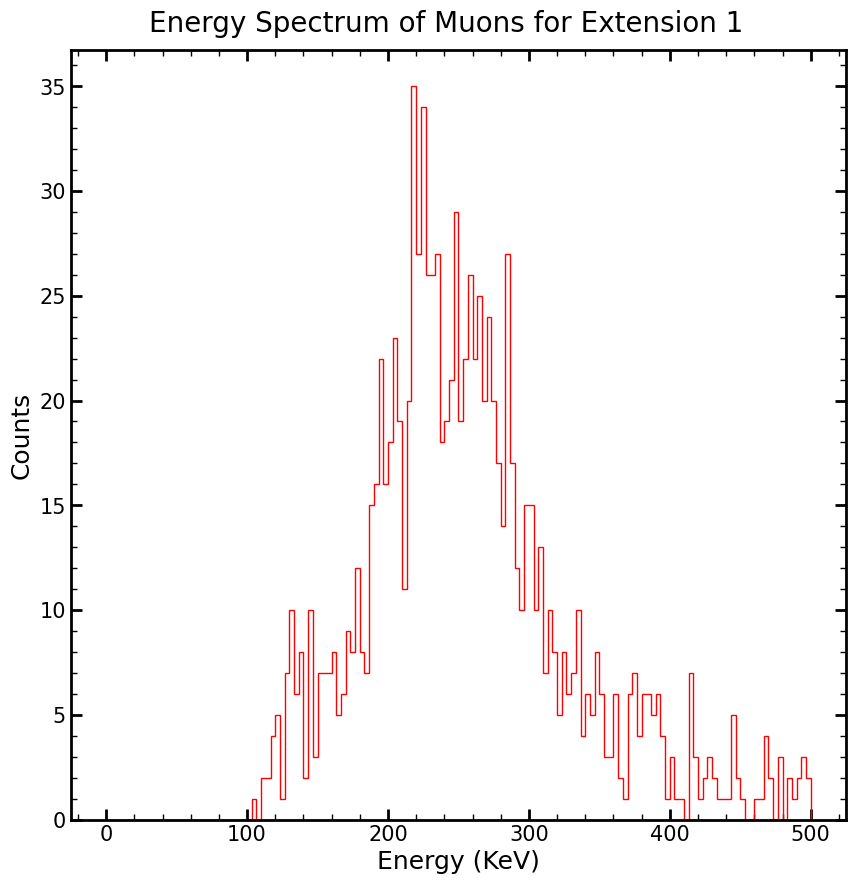

/tmp/ipykernel_5333/1447554191.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


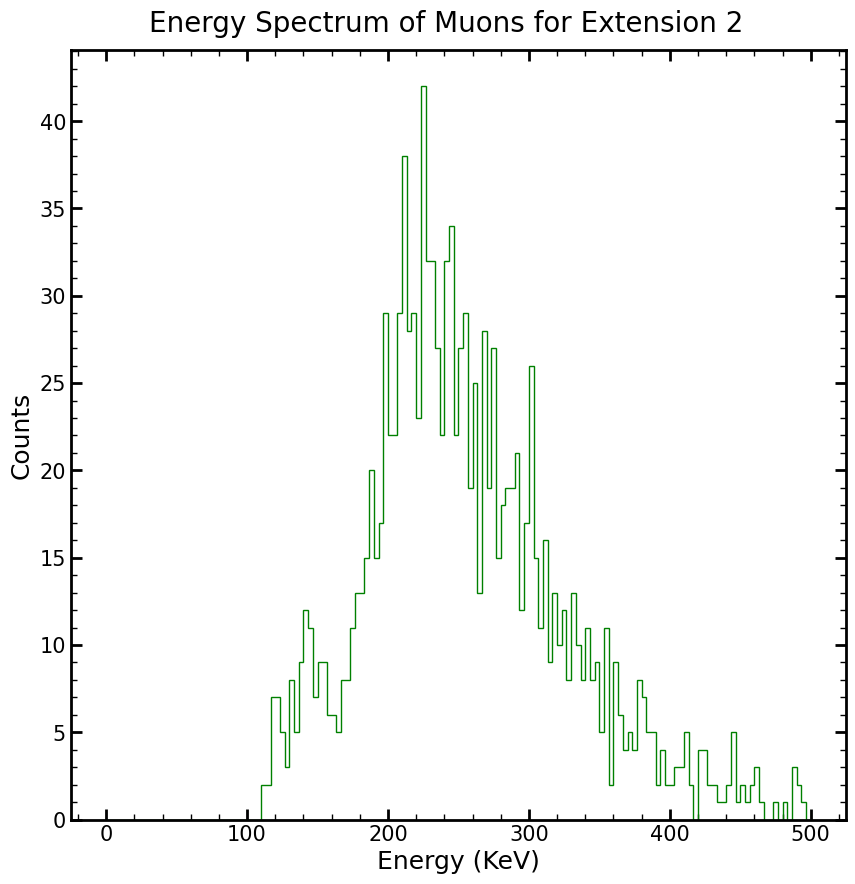

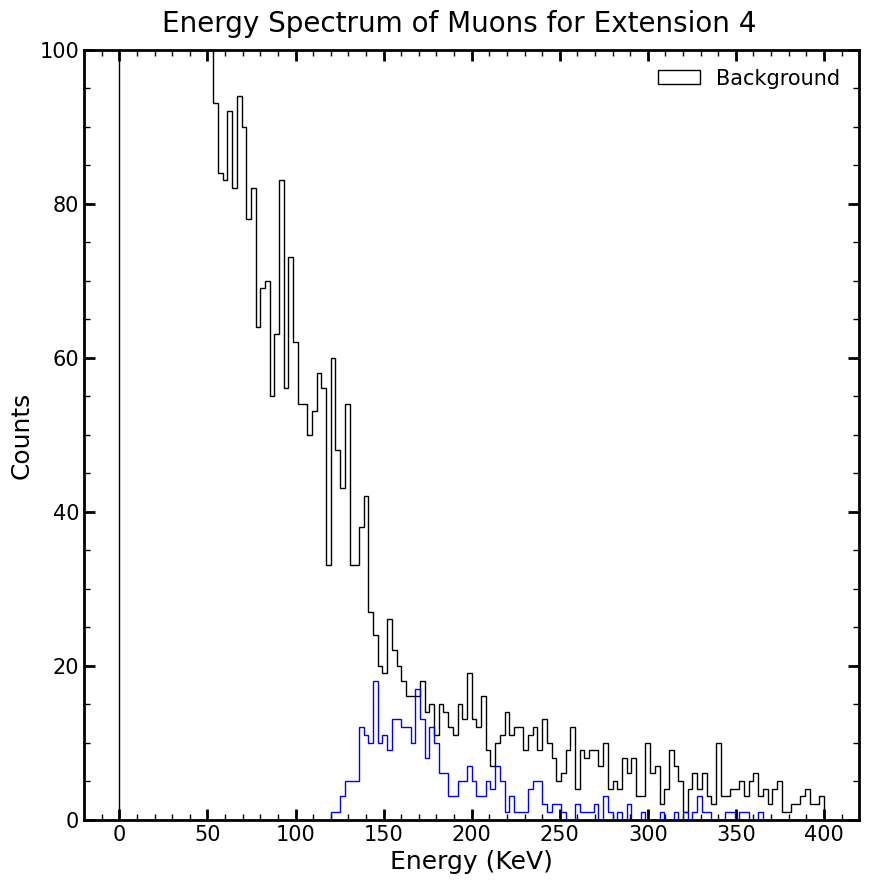

In [10]:
# print(np.max(data_muons_extension_4['charge']))
BINS = 150
############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

# axs.hist(data_muons_extension_1['all_events'] , bins = BINS, range= (0.5, 500), 
#             color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_1['charge'] , bins = BINS, range= (0, 500), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,100)
# axs.set_xlim(0,100)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = BINS,range= (0.5, 500), 
#             color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_2['charge'] , bins = BINS, range= (0, 500), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,100)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 4 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_4['all_events'], bins = BINS, range= (0, 400), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_4['charge'] , bins = BINS, range= (0, 400), 
            color = 'b', histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,100)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

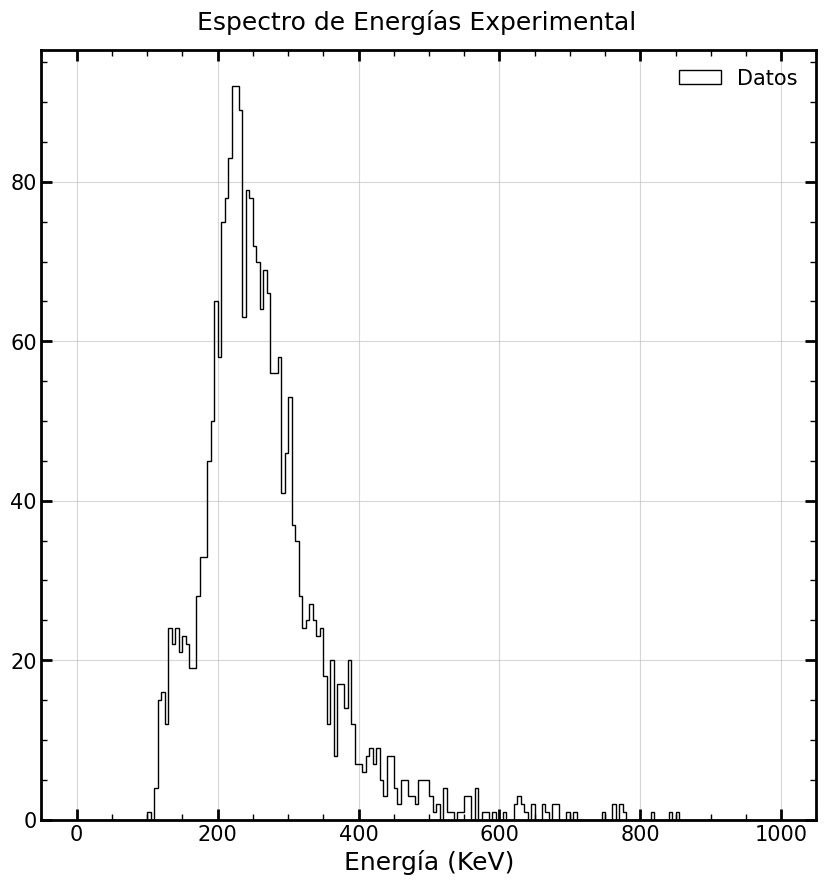

In [11]:
data_ext_1_2_edep = data_muons_extension_1['charge'] + data_muons_extension_2['charge']
data_ext_1_2_long = data_muons_extension_1['deltaL'] + data_muons_extension_2['deltaL']
data_ext_1_2_thet = data_muons_extension_1['theta'] + data_muons_extension_2['theta']
data_ext_1_2_phi = data_muons_extension_1['phi'] + data_muons_extension_2['phi']
data_ext_1_2_elip = data_muons_extension_1['elip'] + data_muons_extension_2['elip']
data_ext_1_2_sol = data_muons_extension_1['sol'] + data_muons_extension_2['sol']
data_ext_1_2_dedl = data_muons_extension_1['deltaEL'] + data_muons_extension_2['deltaEL']

data_ext_1_2_elip_all = data_muons_extension_1['all_events_elip'] + data_muons_extension_2['all_events_elip']
data_ext_1_2_sol_all = data_muons_extension_1['all_events_sol'] + data_muons_extension_2['all_events_sol']

Bins = 200
max_energy = 1000
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extensiones 1 & 2',  histtype = 'step')
axs.hist(data_ext_1_2_edep, bins = Bins, range = [0, max_energy], color = 'k', label= 'Datos',  histtype = 'step')

axs.legend()

# axs.set_xlim(0, 500)
axs.set_xlabel('Energía (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Espectro de Energías Experimental', size = 18, y=0.92)
axs.grid()
plt.show()

In [62]:
hist, bins_edges = np.histogram(data_ext_1_2_edep, bins=BINS, range = (0, max_energy))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  220.0  KeV


In [11]:
from ROOT import TFile, TTree
from array import array

# N_Muons = array('f', [-9999])
Thet_Rad = array('f', [-9999])
Phi_Rad = array('f', [-9999])
Elip_array = array('f', [-9999])
Sol_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])
Delta_EL_array = array('f', [-9999])

location_file = '../Simulacion_ab_initio/'
file_root_name = 'tree_muons_ICN_NSAMP324_250x539_SIGMAS_13_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

# tree.Branch('nmuon',N_Muons, 'nmuon/F' )
# tree.Branch('epri', Energy_array, 'epri/F')

tree.Branch('l', DeltaL_array, 'l/F')
tree.Branch('edep', Energy_Landau_array, 'edep/F')
tree.Branch('thet', Thet_Rad, 'thet/F')
tree.Branch('phi', Phi_Rad, 'phi/F')
tree.Branch('elip', Elip_array, 'elip/F')
tree.Branch('sol', Sol_array, 'sol/F')
tree.Branch('dedl', Delta_EL_array, 'dedl/F')

for i in np.arange(0, len(data_ext_1_2_edep)):
    Thet_Rad[0] = data_ext_1_2_thet[i]
    Phi_Rad[0] = data_ext_1_2_phi[i]
    DeltaL_array[0] = data_ext_1_2_long[i]
    Energy_Landau_array[0] = data_ext_1_2_edep[i] / 1000
    Elip_array[0] = data_ext_1_2_elip[i]
    Sol_array[0] = data_ext_1_2_sol[i]
    Delta_EL_array[0] = data_ext_1_2_dedl[i]

    tree.Fill()

tree.Write()
file.Close()

Elipall_array = array('f', [-9999])
Solall_array = array('f', [-9999])

location_file = '../Simulacion_ab_initio/'
file_root_name = 'tree_nonmuons_ICN_NSAMP324_250x539_SIGMAS_20_MeV.root'
# file_root_name = 'Edep_muons_CONNIE_NSAMP400_700x420_SIGMAS_5_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

tree.Branch('elip', Elipall_array, 'elip/F')
tree.Branch('sol', Solall_array, 'sol/F')

for i in np.arange(0, len(data_ext_1_2_elip_all)):
    Elipall_array[0] =  data_ext_1_2_elip_all[i]
    Solall_array[0] =  data_ext_1_2_sol_all[i]
    # print(DeltaL_array[0])

    tree.Fill()

tree.Write()
file.Close()

### NSAMP0

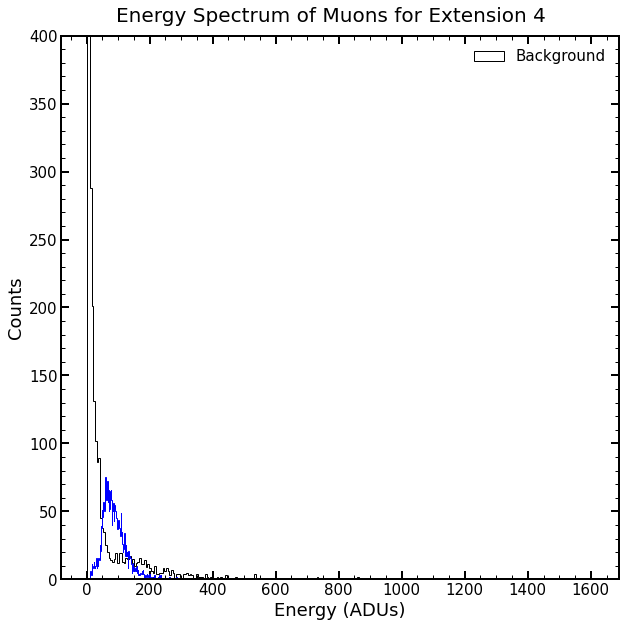

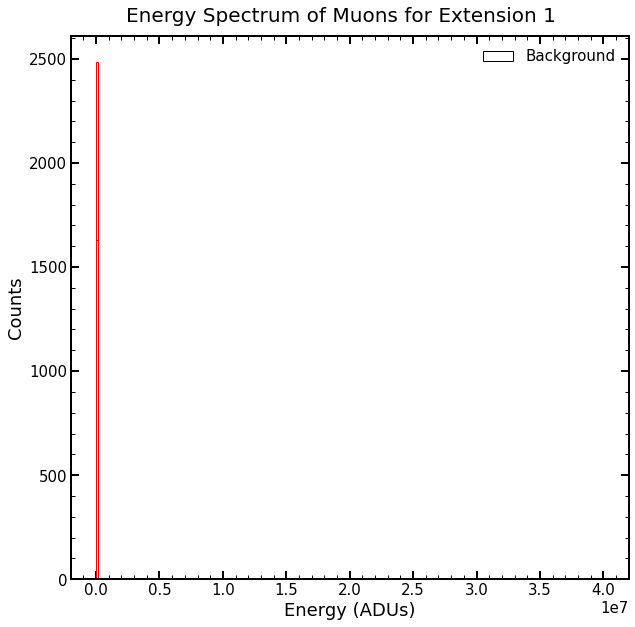

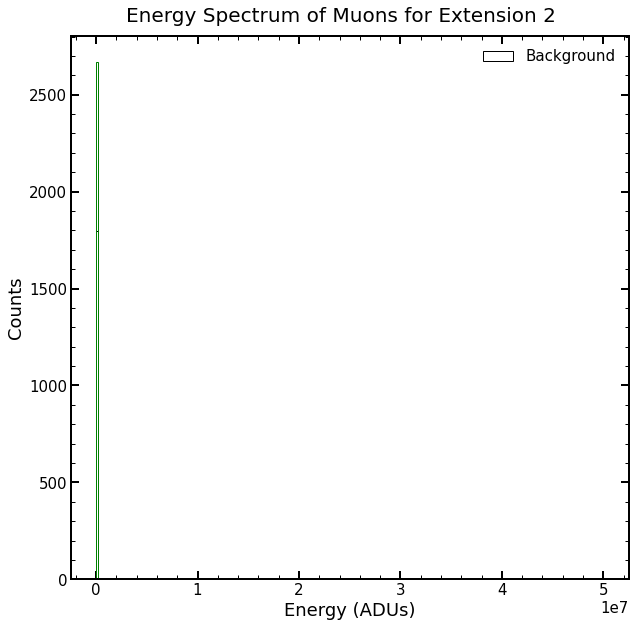

In [ ]:
# print(np.max(data_muons_extension_4['charge']))

############################################
BINS = 300

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_4['all_events'], bins = BINS, range= (0,1.6 * 10**7), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_4['charge'] , bins = BINS, range= (0,1.6 * 10**7), 
            color = 'b', histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,400)
axs.set_xlim(0,0.175 * 10**8)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

#############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(data_muons_extension_1['all_events'] , bins = BINS, range= ((np.min(data_muons_extension_1['charge']), 4 * 10**7)), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_1['charge'] , bins = BINS, range= (np.min(data_muons_extension_1['charge']), 4 * 10**7), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()

############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_2['all_events'], bins = BINS,range= (np.min(data_muons_extension_2['charge']), 5 * 10**7), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_2['charge'] , bins = BINS, range= (np.min(data_muons_extension_2['charge']), 5 * 10**7), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

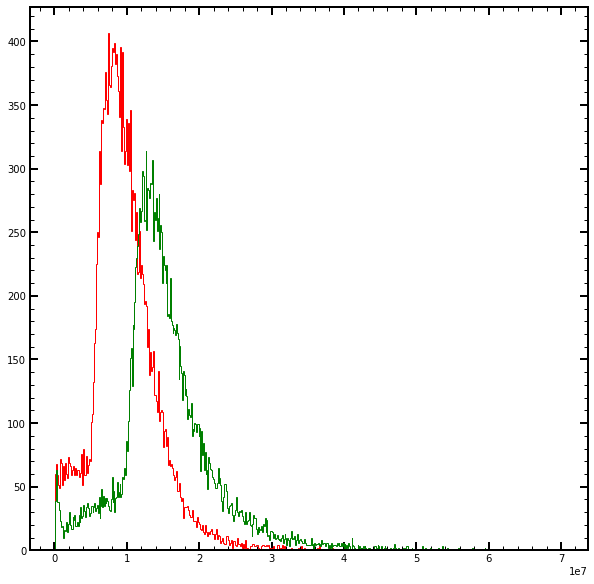

In [9]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_muons_extension_1['charge'], bins = 500, range= (np.min(data_muons_extension_1['charge']), np.max(data_muons_extension_1['charge'])/3), 
            color = 'r', label= 'Extension 1',  histtype = 'step')

axs.hist(data_muons_extension_2['charge'], bins = 500, range= (np.min(data_muons_extension_2['charge']), np.max(data_muons_extension_2['charge'])/20), 
            color = 'g', label= 'Extension 2',  histtype = 'step')

axs.hist(data_muons_extension_4['charge'], bins = 500, range= (np.min(data_muons_extension_4['charge']), np.max(data_muons_extension_4['charge'])/2), 
            color = 'b', label= 'Extension 4',  histtype = 'step')

axs.legend()

axs.set_xlim(0, 4 * 10**7)
axs.set_xlabel('Energy (ADUs)', size = 18,loc='center')
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

#### Calibracion en KeV

In [ ]:
BINS = 300

hist_1, bins_edges_1 = np.histogram(data_muons_extension_1['charge'], bins=BINS)
hist_2, bins_edges_2 = np.histogram(data_muons_extension_2['charge'], bins=BINS)
hist_4, bins_edges_4 = np.histogram(data_muons_extension_4['charge'], bins=BINS)

# print(bins_edges_1[np.argmax(hist_1)])
print('Pico de Extensión 1: ', bins_edges_1[np.argmax(hist_1)], 'ADUs')
print('Pico de Extensión 2: ', bins_edges_2[np.argmax(hist_2)], 'ADUs')
print('Pico de Extensión 4: ', bins_edges_4[np.argmax(hist_4)], 'ADUs', end='\n\n')

# print(bins_edges_2[np.argmax(hist_2)])

DEltaP = 152.545 #KeV para muones con momento de 600 MeV
print('El valor del pico de Landau para muones con momento de 600 MeV es: ', DEltaP, 'KeV', end='\n\n')
cal_1 =  bins_edges_1[np.argmax(hist_1)] / DEltaP ## ADUs/KeV
cal_2 =  bins_edges_2[np.argmax(hist_2)] / DEltaP ## ADUs/KeV
cal_4 =  bins_edges_4[np.argmax(hist_4)] / DEltaP ## ADUs/KeV

print('La calibración para cada extensión es: ')
print(cal_1, 'ADUs/KeV')
print(cal_2, 'ADus/KeV')
print(cal_4, 'ADUs/KeV')

Pico de Extensión 1:  7748516.0 ADUs
Pico de Extensión 2:  12059729.0 ADUs
Pico de Extensión 4:  6139996.5 ADUs

El valor del pico de Landau para muones con momento de 600 MeV es:  152.545 KeV

La calibración para cada extensión es: 
50794.95230915468 ADUs/KeV
79056.86190960045 ADus/KeV
40250.39496542004 ADUs/KeV


In [20]:
## Relacion entre ADUs y electrones 

rel_KeV_elec = 0.0037 #KeV

cal_KeV_e_1 = cal_1 * rel_KeV_elec
cal_KeV_e_2 = cal_2 * rel_KeV_elec
cal_KeV_e_4 = cal_4 * rel_KeV_elec

print('La calibración para cada extensión es: ')
print(cal_KeV_e_1, 'ADUs/e-')
print(cal_KeV_e_2, 'ADus/e-')
print(cal_KeV_e_4, 'ADUs/e-', end='\n\n')

expgain = [227, 220.4, 94.72, 197.7]

print('La calibración para las impagenes de 324')
print(expgain[0], 'ADUs/e-')
print(expgain[1], 'ADus/e-')
print(expgain[3], 'ADUs/e-')

La calibración para cada extensión es: 
187.94132354387233 ADUs/e-
292.5103890655217 ADus/e-
148.92646137205415 ADUs/e-

La calibración para las impagenes de 324
227 ADUs/e-
220.4 ADus/e-
197.7 ADUs/e-


In [39]:
## Cada dato se calibra con el valor del pico
data_1_cal = []
data_2_cal = []
data_4_cal = []
for index in np.arange(0, len(data_muons_extension_2['charge'])):
    data_1 = data_muons_extension_1['charge'][index] /cal_1
    data_2 = data_muons_extension_2['charge'][index] /cal_2
    data_4 = data_muons_extension_4['charge'][index] /cal_4
    data_1_cal.append(data_1)
    data_2_cal.append(data_2)
    data_4_cal.append(data_4)

In [40]:
all_hist, bins_edges_all = np.histogram(data_1_cal + data_2_cal + data_4_cal, bins=BINS)
DelP = np.round(bins_edges_all[np.argmax(all_hist)], 3)

print('Pico de la suma de las tres extensiones calibradas: ', DelP, 'KeV')

Pico de la suma de las tres extensiones calibradas:  152.545 KeV


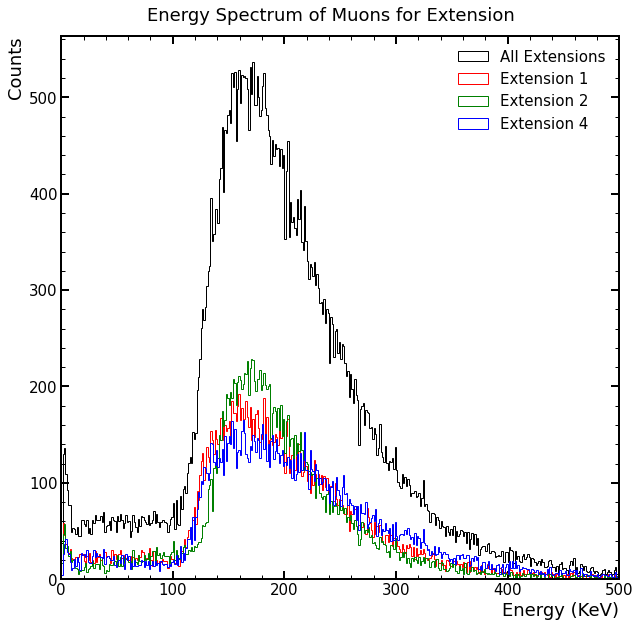

In [41]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_1_cal + data_2_cal + data_4_cal, bins = BINS, range = (0,500), 
            color = 'k', label= 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['charge'] / cal_1, bins = BINS, range = (0,500),
            color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_2['charge'] / cal_2, bins = BINS,  range = (0,500), 
            color = 'g', label= 'Extension 2', histtype = 'step')

axs.hist(data_muons_extension_4['charge']  / cal_4, bins = BINS,  range = (0,500),
            color = 'b', label= 'Extension 4', histtype = 'step')

# axs.vlines(x= DelP, ymax=700, ymin=0,  colors='k', linestyles='dashed',  label = 'DeltaP: ' + str(DelP))

axs.legend()

axs.set_xlim(0,500)
axs.set_xlabel('Energy (KeV)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

## Espectro de distancias

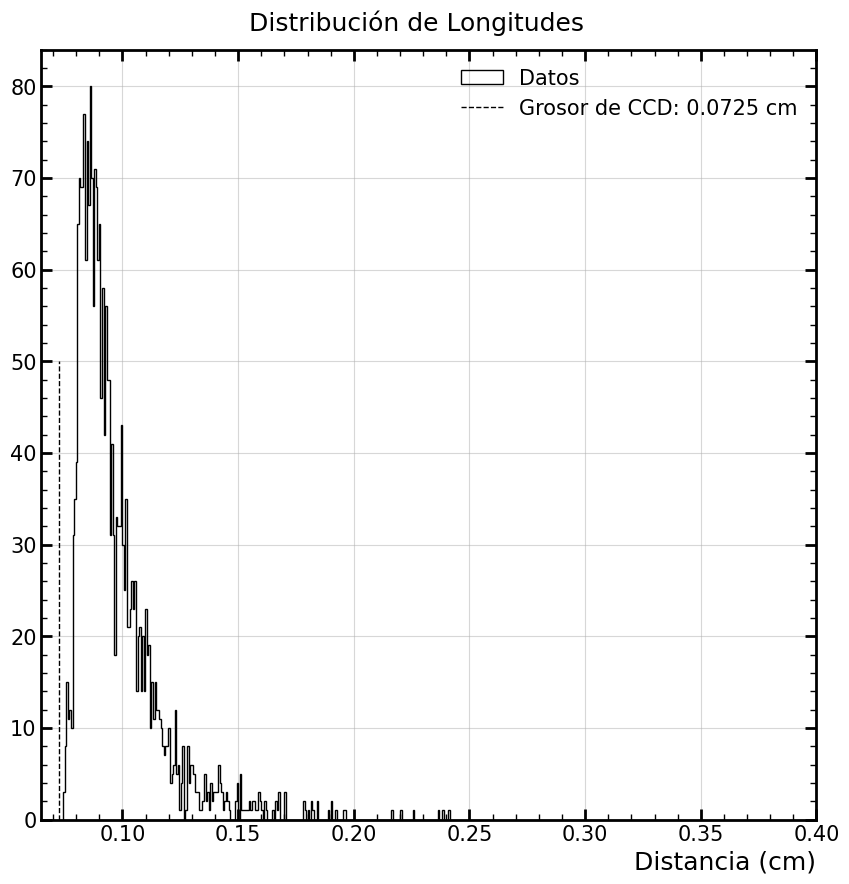

In [13]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 250
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
# axs.hist(data_muons_extension_1['deltaL'] + data_muons_extension_2['deltaL'] + data_muons_extension_4['deltaL'], bins=BINS, color = 'k',
#         label = 'Datos', histtype = 'step')
axs.hist(data_ext_1_2_long, bins=BINS, color = 'k',
        label = 'Datos', histtype = 'step')

# axs.hist(data_muons_extension_1['deltaL'], bins = BINS, range= (np.min(data_muons_extension_1['deltaL']), np.max(data_muons_extension_1['deltaL'])), 
#             color = 'r', label= 'Extension 1', histtype = 'step')

# axs.hist(data_muons_extension_2['deltaL'], bins = BINS, range= (np.min(data_muons_extension_2['deltaL']), np.max(data_muons_extension_2['deltaL'])), 
#             color = 'g', label= 'Extension 2', histtype = 'step')

# axs.hist(data_muons_extension_4['deltaL'], bins = BINS, range= (np.min(data_muons_extension_4['deltaL']), np.max(data_muons_extension_4['deltaL'])), 
#             color = 'b', label= 'Extension 4', histtype = 'step')
            
axs.vlines(x=0.0725, ymax=50, ymin=0,  colors='k', linestyles='dashed',  label = 'Grosor de CCD: 0.0725 cm')

axs.legend()
axs.grid()

axs.set_xlim(0.065,0.4)
axs.set_xlabel('Distancia (cm)', size = 18)
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Distribución de Longitudes', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Theta

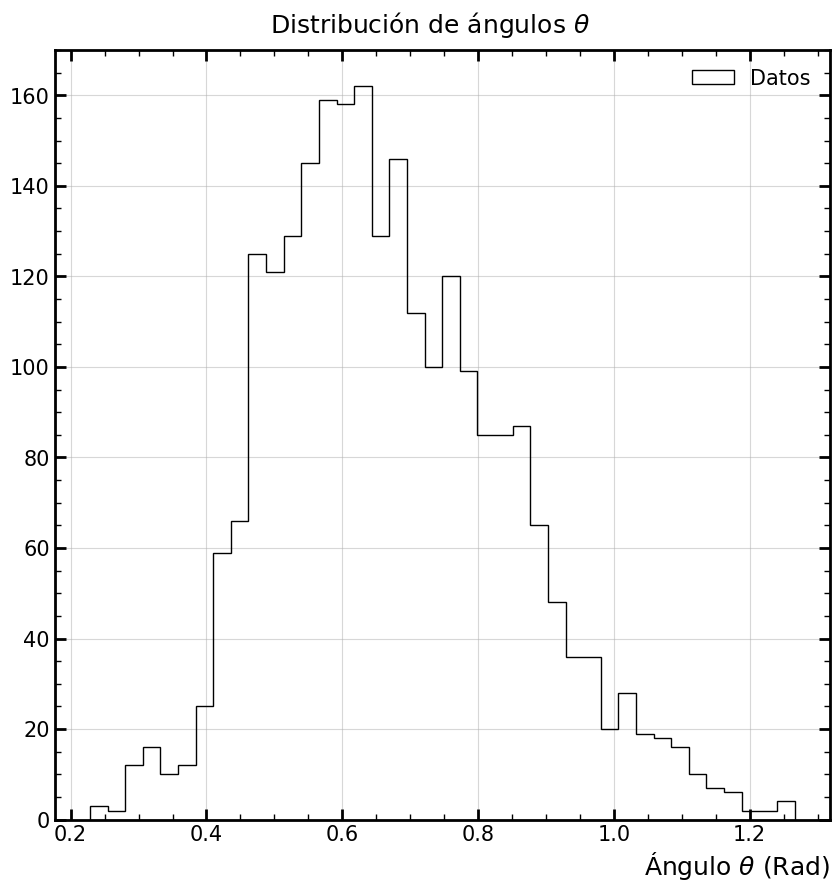

In [18]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 40

# axs.hist(data_muons_extension_1['theta'] + data_muons_extension_2['theta'] + data_muons_extension_4['theta'], bins=BINS, color = 'k',
#         label = 'Datos', histtype = 'step')
axs.hist(data_ext_1_2_thet, bins=BINS, color = 'k', label = 'Datos', histtype = 'step')

# axs.hist(data_muons_extension_1['theta'], bins = BINS, range= (np.min(data_muons_extension_1['theta']), np.max(data_muons_extension_1['theta'])), 
#             color = 'r', label= 'Extension 1', histtype = 'step')

# axs.hist(data_muons_extension_2['theta'], bins = BINS, range= (np.min(data_muons_extension_2['theta']), np.max(data_muons_extension_2['theta'])), 
#             color = 'g', label= 'Extension 2', histtype = 'step')

# axs.hist(data_muons_extension_4['theta'], bins = BINS, range= (np.min(data_muons_extension_4['theta']), np.max(data_muons_extension_4['theta'])), 
#             color = 'b', label= 'Extension 4', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0.065,0.2)
axs.set_xlabel(r'Ángulo $\theta$ (Rad)', size = 18)
# axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribución de ángulos $\theta$', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Phi

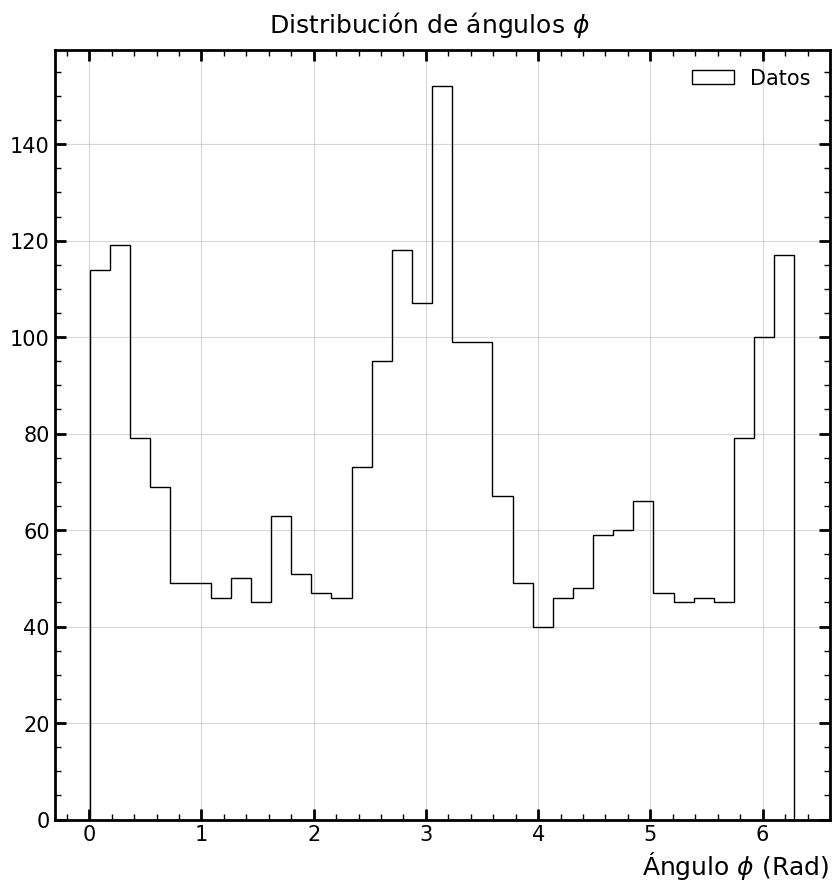

In [20]:
fig, axs = plt.subplots(figsize = [10,10])
BINS = 35

# axs.hist(data_muons_extension_1['phi'] + data_muons_extension_2['phi'] + data_muons_extension_4['phi'], bins=BINS, color = 'k',
#         label = 'Datos', histtype = 'step', range =  (0, 2 * np.pi))
axs.hist(data_ext_1_2_phi, bins=BINS, color = 'k', label = 'Datos', histtype = 'step')#, range =  (0, 2 * np.pi))

# axs.hist(data_muons_extension_1['phi'], bins = BINS, range= (-0.1, 6.5), 
#             color = 'r', label= 'Extension 1', histtype = 'step')

# axs.hist(data_muons_extension_2['phi'], bins = BINS, range=  (-0.1, 6.5), 
#             color = 'g', label= 'Extension 2', histtype = 'step')

# axs.hist(data_muons_extension_4['phi'], bins = BINS, range=  (-0.1, 6.5), 
#             color = 'b', label= 'Extension 4', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0)
axs.set_xlabel(r'Ángulo $\phi$ (Rad)', size = 18)
# axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribución de ángulos $\phi$', size = 18, y=0.92)
plt.show()